##### This Code helps us to understand COVID-19-CAMEROON-Data,data analysis and making decision base on statistical analysis, data analysis technique, machine learning and artificial intelligence ####
#### Other: Blondel Kenne #### 
#### Companie: kenneelectric llc, website: www.kenneelectric.com
#### tilte:  Data scientist  ####
#### date: 4 - 15 - 20202 ####

# TIME DEPENDENT MODEL SIR-COVID-19-CAMEROON(Population Change Over Time)

# Definition and Term
We take all people in Cameroon and divide them into 3 groupes


# susceptible S(t):
All people in Cameroon Capable of becomming sick from the COVID-19
# Infected I(t):
All people in Cameroon infected by the COVID-19(when infected you get it only one time and live the susceptible population
# Recorvered R(t):
All people in Cameroon that recovered or died from COVID-19( can not be reinfected and give to others).Recovered groupe was infected and transition to recovered status to fully recovered or died
# System of differential equation
we want to know the rate of change of each groupe 
# dS/dt: 
how the number of susceptible is changing over time.Depend on probability of proximity between individual(interaction or likelyhood of interaction
# dI/dt: 
how the number of infection is changing over time. S transit to I to get infected
# dR/dt: 
how the number of recorvered is changing over time
# Reproductive rate or degree of spraidability(Rr0): 
it is how much can one person infect (secondary infection) others. it is the number of new cases that existing cases generates on average over the infection perode in the susceptible population.(Rr0 = aS0/b = S0q) 
# Rr0 = new cases / existing cases
# Serial intervales (SI) :
is defined as the time duration between a primary case-patient (infector) having symptom onset and a secondary case-patient (infectee) having symptom onset (2). The distribution of COVID-19 serial intervals is a critical input for determining the basic reproduction number (Rr0) and the extent of interventions required to control an epidemic(source:https://wwwnc.cdc.gov/eid/article/26/6/20-0357_article) reference:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3057478/
# Recovered coefficient (b) :
is 1/number of days it takes to revover from the desease(k). 
(1/k = b) is the mean period of time during which an infected individual can pass it on.
# Transmition coeficient (a):
(a) describes the effective contact rate of the disease: an infected individual comes into contact with n other individuals per unit time (of which the fraction that are susceptible to contracting the disease is S/N).(a = pq) where p: probability of becomming in contact with didease; q: chance of falling ills with the disease if you are in contact
# Assumption to the Model
 In mathematical modeling we have to make assumption to simplify analysis
 
 1 - Population remain constent(the disease is short)
 
 2 - Rate of infection proportional to the contact between the susceptible and infected at constant rate
 
 3- infected will fully recover or died at constant rate 
 
 #### Using COVID19-CAMEROON data,we assume that the median time from onset to clinical recovery for mild cases is approximately 2 weeks(15days) and is 3-6 weeks(42days) for patients with severe or critical disease.



In [324]:
# import packages
import scipy.integrate
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime 

In [325]:
import os
os.getcwd()

'C:\\Users\\18562'

In [326]:
# MODEL
# The SIR model differential equations.
def SIR_TIME_DEPENDENT_MODEL(Y,t,a,b):
    S,I,R = Y
    dS_dt = -a*S*I
    dI_dt = a*S*I - b*I
    dR_dt = b*I
 
    return([dS_dt,dI_dt,dR_dt])

# CAMEROON'S CORONA VIRUS DATA  FROM 02-24-2020 T0 04-16-2020
#### source: https://www.worldometers.info/coronavirus/country/cameroon/;  https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Cameroon; https://tradingeconomics.com/cameroon/coronavirus-deaths

In [327]:
# making series from list 
#series = pd.Series(values) 
  
date            = pd.Series( pd.date_range(start="2020-02-24",end="2020-04-17") )

daily_deaths    = pd.Series( [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                              0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,0,0, 
                              0,1,1,1,0,0,0,1,2,0,0,0,0,2,3,0,5])

Total_deaths     = daily_deaths.cumsum() 

Total_recorvered = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,
                              0,0,0,0,0,0,0,0,0,0,0,0,
                              0,0,0,0,0,0,0,0,0,0,5,5,
                              5,5,10,17,17,17,17,60,
                              60,61,98,98,98,108,130,165,165,168])
  
Total_cases      = pd.Series( [1,1,1,1,1,1,1,1,1,1,1,2,
                               2,2,2,2,2,2,2,2,2,2,2,7,
                               7,27,40,0,56,66,70,88,92,113,139,142,
                               193,233,284,509,555,658,658,730,780,803, 
                               820, 820,820, 848, 848, 848,996,996])

Daily_new_cases = pd.Series([1,0,0,0,0,0,0,0,0,0,0,1,
                             0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 5 ,
                             0,20,13,0,16,10,4,18,4,21,26,3,
                             51,40,51,225,46,0,103,72,50,73,17, 0,
                             0,28,0,0,148,0])

New_cases_R0 = pd.Series([1,0,0,0,0,0,0,0,0,0,0,5,
                          0,0,0,0,0,0,0,0,0,0,0,20,
                          0,13,17,0,10,4,18,4,21,26,29,51,
                          40,51,225,46,103,0,27,95,73,17,0,0,
                          28,0,0,148,0,0])

Active_cases     = Total_cases - (Total_recorvered + Total_deaths)

Covid_19_cameroon_data = pd.DataFrame( {'date':date, 'Total_cases':Total_cases,'Daily_new_cases':Daily_new_cases, 'New_cases_R0':New_cases_R0,'Active_cases':Active_cases,'Total_deaths':Total_deaths,
                                         'daily_deaths':daily_deaths,'Total_recorvered':Total_recorvered})

Covid_19_cameroon_data['Reproductive_ratio'] = (Covid_19_cameroon_data['New_cases_R0']/Covid_19_cameroon_data['Total_cases']).fillna(0)

In [328]:
Covid_19_cameroon_data

,date,Total_cases,Daily_new_cases,New_cases_R0,Active_cases,Total_deaths,daily_deaths,Total_recorvered,Reproductive_ratio
0,2020-02-24,1,1,1,1,0,0,0,1.000000
1,2020-02-25,1,0,0,1,0,0,0,0.000000
2,2020-02-26,1,0,0,1,0,0,0,0.000000
3,2020-02-27,1,0,0,1,0,0,0,0.000000
4,2020-02-28,1,0,0,1,0,0,0,0.000000
5,2020-02-29,1,0,0,1,0,0,0,0.000000
6,2020-03-01,1,0,0,1,0,0,0,0.000000
7,2020-03-02,1,0,0,1,0,0,0,0.000000
8,2020-03-03,1,0,0,1,0,0,0,0.000000
9,2020-03-04,1,0,0,1,0,0,0,0.000000


# Reproductive rate or degree of spraidability(Rr0): 
### how much can one person infect (secondary infection) others.
### the number of new cases that existing cases generates on average over the infection perode in the susceptible population.
# (Rr0 = a*S0*/b = S0*q) 

Mean: 0.20037948945524453
Median: 0.0
Mode: 0    0.0
dtype: float64
max:  2.857142857142857
min:  0.0
Skewness: 4.028924778316295
Range:  2.857142857142857
Standard Deviation:  0.52457064076571


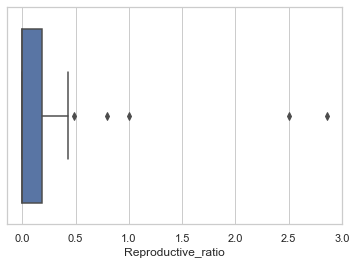

In [329]:
import statistics
from scipy.stats import skew
x = Covid_19_cameroon_data["Reproductive_ratio"]
# Measures of Central Tendency
mean   = x.mean()
median = x.median()
mode   = x.mode()
sns.set(style="whitegrid")
ax = sns.boxplot(x=Covid_19_cameroon_data["Reproductive_ratio"])
print('Mean: {}'.format(mean))
print('Median: {}'.format(median))
print('Mode: {}'.format(mode))
print('max: ',x.max())
print('min: ',x.min())
print('Skewness: {}'.format(skew(x)))
#Measures of Dispersion
r=x.max()-x.min()
print('Range: ',r)
#Variance
sigma=np.std(x)
print('Standard Deviation: ',sigma)



<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x576 with 0 Axes>

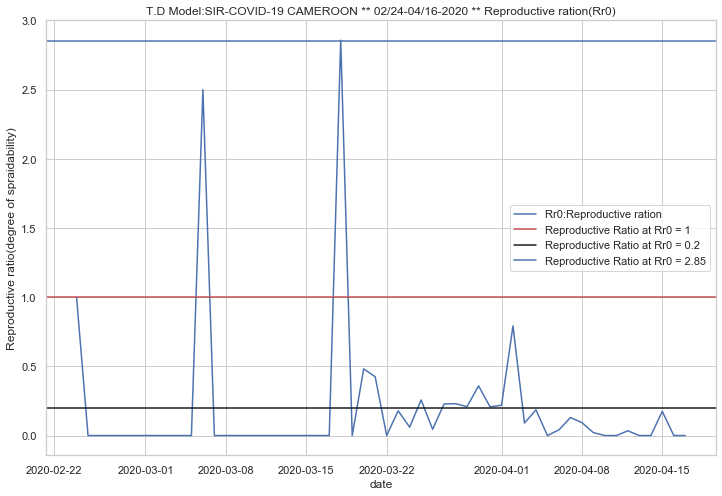

In [330]:
plt.figure(figsize = [12,8])
t= Covid_19_cameroon_data['date']
y= Covid_19_cameroon_data['Reproductive_ratio']
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize = [12,8])
plt.plot(t, y,label = "Rr0:Reproductive ration")
xcoords = [1, 0.2, 2.85]
# colors for the lines
colors = ['r','k','b']

for xc,c in zip(xcoords,colors):
    plt.axhline(y=xc, label='Reproductive Ratio at Rr0 = {}'.format(xc), c=c)

plt.legend()
plt.xlabel("date")
plt.ylabel("Reproductive ratio(degree of spraidability)")
plt.title("T.D Model:SIR-COVID-19 CAMEROON ** 02/24-04/16-2020 ** Reproductive ration(Rr0)")
plt.show

# Serial intervales (SI) :
### Time duration between a primary case-patient (infector) having symptom onset and a secondary case-patient (infectee) having symptom onset (2). 
### Transmission events reported during the early stages of outbreaks
column = ["Event_index","Infector_ID","Infectee ID","City","Province","infection_location","Infector_symptom_onset_date","Age",
"Sex","Secondary_infection location","Seconday_symptom onset date","Seconday_Age","Seconday_Sex","Contact_type",]

# INITIAL CONDITION BEFORE THE GOVERMENT MESURES ON 03-15-2020

In [331]:
# Total population, N.
N = 26390686 
# Initial number of infected and recovered individuals, I0 and R0.
# as of the first declare case in cameroon on 02-24-2020 to 03-20-2020
# Everyone else, S0, is susceptible to infection initially.
I0, R0 = 27, 0  # on 03-20-2020
S0 = N - I0 - R0
# transmition coefficient with Rr0( daily reproduction rate of COVID-19 cases from 02-24-2020 t0 03-20-2020, Rr0_min = 0
#Rr0_av_wthZerodays = 1.27
a0 =  0.0000000032
#Rro_av_woutZerodays = 2.11
a1 = 0.0000000053
#Rr0_max = 2.85
a2 =  0.0000000072
# b is 1/number of days it takes to revover from the desease(n)  
# 1/n is the mean period of time during which an infected individual can pass it on.
# we assume it takes in average 15-30 days to recover from Covid-19 in Cameroon
b =  1 / 15

# TIME VICTOR

In [332]:
# A grid of time points (in days)
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
#Return evenly spaced numbers over a specified interval.
#Returns num evenly spaced samples, calculated over the interval [start, stop].
#The endpoint of the interval can optionally be excluded.
#Changed in version 1.16.0: Non-scalar start and stop are now supported.

t = np.linspace(0, 160, 160)


# Result

In [333]:
# Initial conditions vector
# Integrate the SIR equations over the time grid, t.
solution0 = scipy.integrate.odeint( SIR_TIME_DEPENDENT_MODEL,[S0,I0,R0],t,args = (a0,b))
soluion0  = np.array(solution0)

solution1 = scipy.integrate.odeint( SIR_TIME_DEPENDENT_MODEL,[S0,I0,R0],t,args = (a1,b))
soluion1  = np.array(solution1)

solution2 = scipy.integrate.odeint( SIR_TIME_DEPENDENT_MODEL,[S0,I0,R0],t,args = (a2,b))
soluion2  = np.array(solution2)


# PLOT THE RESULT

<function matplotlib.pyplot.show(*args, **kw)>

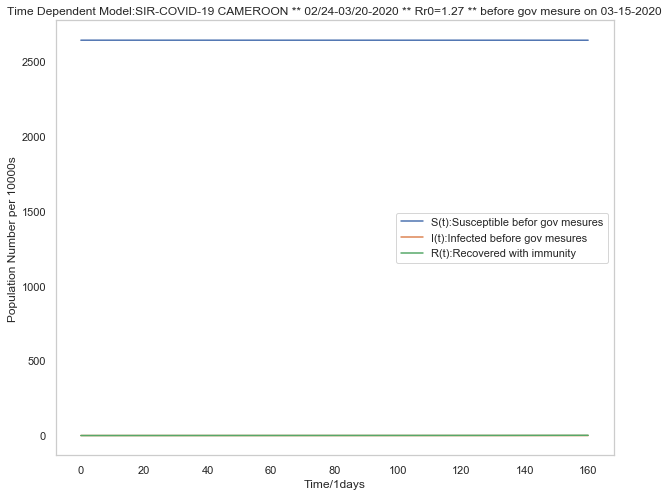

In [334]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize = [10,8])
plt.plot(t, solution0[:,0]/10000,label = "S(t):Susceptible befor gov mesures")
plt.plot(t, solution0[:,1]/10000,label = "I(t):Infected before gov mesures")
plt.plot(t, solution0[:,2]/1000,label = "R(t):Recovered with immunity")
plt.grid()
plt.legend()
plt.xlabel("Time/1days")
plt.ylabel("Population Number per 10000s")
plt.title("Time Dependent Model:SIR-COVID-19 CAMEROON ** 02/24-03/20-2020 ** Rr0=1.27 ** before gov mesure on 03-15-2020")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

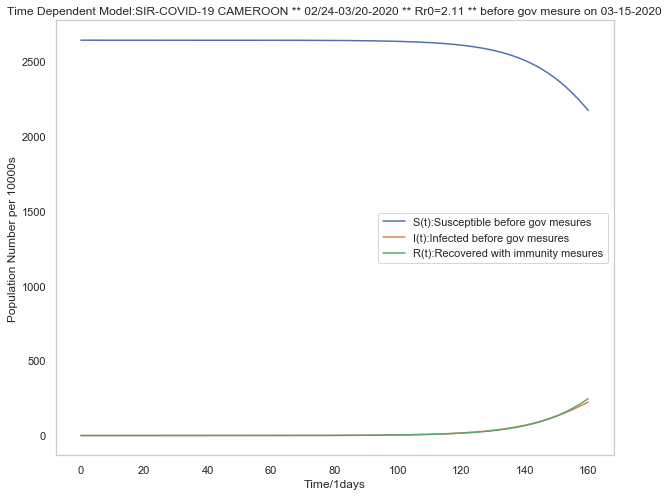

In [335]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize = [10,8])
plt.plot(t, solution1[:,0]/10000,label = "S(t):Susceptible before gov mesures")
plt.plot(t, solution1[:,1]/10000,label = "I(t):Infected before gov mesures")
plt.plot(t, solution1[:,2]/10000,label = "R(t):Recovered with immunity mesures")
plt.grid()
plt.legend()
plt.xlabel("Time/1days")
plt.ylabel("Population Number per 10000s")
plt.title("Time Dependent Model:SIR-COVID-19 CAMEROON ** 02/24-03/20-2020 ** Rr0=2.11 ** before gov mesure on 03-15-2020")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

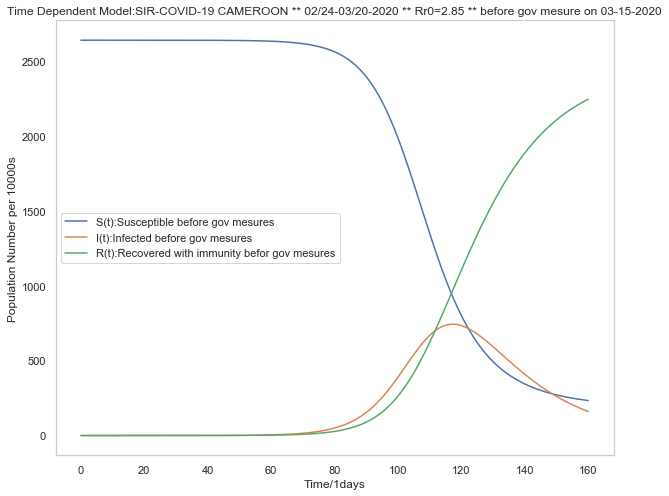

In [336]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize = [10,8])
plt.plot(t, solution2[:,0]/10000,label = "S(t):Susceptible before gov mesures")
plt.plot(t, solution2[:,1]/10000,label = "I(t):Infected before gov mesures")
plt.plot(t, solution2[:,2]/10000,label = "R(t):Recovered with immunity befor gov mesures")
plt.grid()
plt.legend()
plt.xlabel("Time/1days")
plt.ylabel("Population Number per 10000s")
plt.title("Time Dependent Model:SIR-COVID-19 CAMEROON ** 02/24-03/20-2020 ** Rr0=2.85 ** before gov mesure on 03-15-2020")
plt.show

In [337]:
Susceptible_population =  pd.Series(solution2[:,0])
Infected_population    =  pd.Series(solution2[:,1])
Removed_population     =  pd.Series(solution2[:,2])
date                   = pd.Series( pd.date_range(start="2020-04-17",end="2020-09-23") )

SIR_MODEL_COVID19_CAMEROON = pd.DataFrame( {'date':date, 'Susceptible_population':Susceptible_population, 'Infected_population':Infected_population, 'Removed_population':Removed_population})
SIR_MODEL_COVID19_CAMEROON

,date,Susceptible_population,Infected_population,Removed_population
0,2020-04-17,2.639066e+07,2.700000e+01,0.000000e+00
1,2020-04-18,2.639065e+07,3.056815e+01,1.928532e+00
2,2020-04-19,2.639065e+07,3.460785e+01,4.111927e+00
3,2020-04-20,2.639064e+07,3.918140e+01,6.583865e+00
4,2020-04-21,2.639063e+07,4.435937e+01,9.382479e+00
...,...,...,...,...
155,2020-09-19,2.460220e+06,1.960472e+06,2.196999e+07
156,2020-09-20,2.426358e+06,1.866006e+06,2.209832e+07
157,2020-09-21,2.394564e+06,1.775670e+06,2.222045e+07
158,2020-09-22,2.364700e+06,1.689329e+06,2.233666e+07


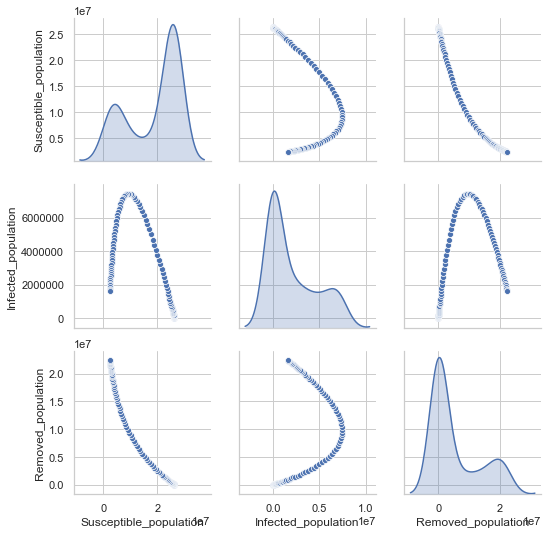

In [338]:
g = sns.pairplot(SIR_MODEL_COVID19_CAMEROON, diag_kind="kde")

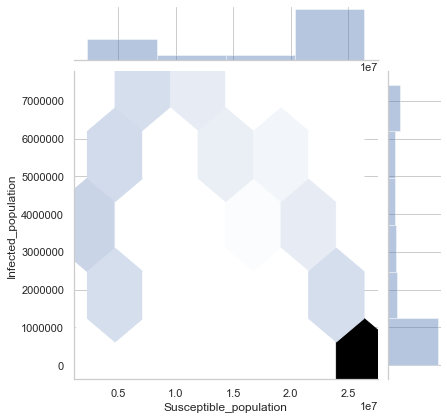

In [339]:
g = sns.jointplot("Susceptible_population", "Infected_population", data= SIR_MODEL_COVID19_CAMEROON, kind="hex")


# INITIAL CONDITION AFTER THE GOVERMENT MESURES ON 03-15-2020


####  INITIAL CONDITION DATE: 04-15-2020  #### 
#### Cameroon Coronavirus Cases:848 Deaths:17 Recovered:165  source:http://apanews.net/en/pays/cameroun/news/cameroons-health-ministry-stops-daily-covid-19-reports####

In [340]:
# Total population, N.
N = 26390686 
# Initial number of infected and recovered individuals, I0 and R0.
# as of the last declare case in cameroon on 04-15-2020
# Everyone else, S0, is susceptible to infection initially.
I0, R0 = 996,186  # on 04-17-2020
S0 = N - I0 - R0
# transmition coefficient with Rr0( daily reproduction rate of COVID-19 cases from 02-24-2020 t0 03-20-2020, Rr0_min = 0
#Rr0_av_wthZerodays = .38, 0.2002
a3 =  0.000000001
#Rro_av_woutZerodays = 1
a4 = 0.0000000025
# b is 1/number of days it takes to revover from the desease(n)  
# 1/n is the mean period of time during which an infected individual can pass it on.
# we assume it takes in average 15 days to recover from Covid-19 in Cameroon
b =  1/25

In [341]:
# Initial conditions vector
# Integrate the SIR equations over the time grid, t.
solution3 = scipy.integrate.odeint( SIR_TIME_DEPENDENT_MODEL,[S0,I0,R0],t,args = (a3,b))
soluion3  = np.array(solution3)

solution4 = scipy.integrate.odeint( SIR_TIME_DEPENDENT_MODEL,[S0,I0,R0],t,args = (a4,b))
soluion4  = np.array(solution4)


<function matplotlib.pyplot.show(*args, **kw)>

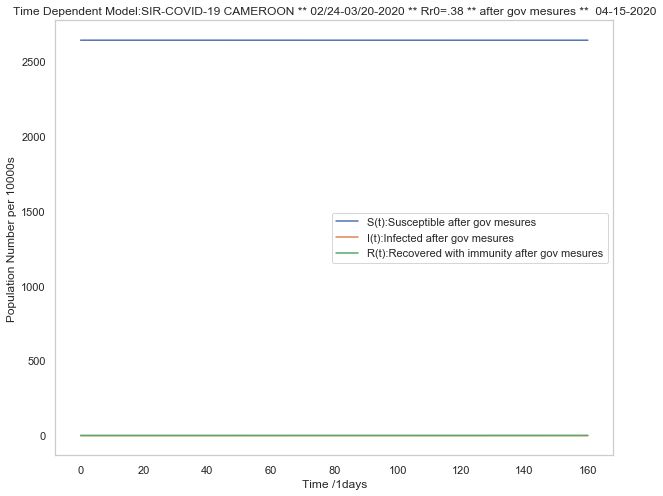

In [342]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize = [10,8])
plt.plot(t, solution3[:,0]/10000,label = "S(t):Susceptible after gov mesures")
plt.plot(t, solution3[:,1]/10000,label = "I(t):Infected after gov mesures")
plt.plot(t, solution3[:,2]/10000,label = "R(t):Recovered with immunity after gov mesures")
plt.grid()
plt.legend()
plt.xlabel("Time /1days")
plt.ylabel("Population Number per 10000s")
plt.title("Time Dependent Model:SIR-COVID-19 CAMEROON ** 02/24-03/20-2020 ** Rr0=.38 ** after gov mesures **  04-15-2020")
plt.show


In [343]:
Susceptible_population =  pd.Series(solution3[:,0])
Infected_population    =  pd.Series(solution3[:,1])
Removed_population     =  pd.Series(solution3[:,2])
date                   = pd.Series( pd.date_range(start="2020-04-17",end="2020-09-23") )

SIR_MODEL_COVID19_CAMEROON = pd.DataFrame( {'date':date, 'Susceptible_population':Susceptible_population, 'Infected_population':Infected_population, 'Removed_population':Removed_population})
SIR_MODEL_COVID19_CAMEROON

,date,Susceptible_population,Infected_population,Removed_population
0,2020-04-17,2.638950e+07,996.000000,186.000000
1,2020-04-18,2.638948e+07,982.451665,225.817276
2,2020-04-19,2.638945e+07,969.087600,265.092924
3,2020-04-20,2.638943e+07,955.905299,303.834314
4,2020-04-21,2.638940e+07,942.902290,342.048712
...,...,...,...,...
155,2020-09-19,2.638780e+07,119.184891,2762.718309
156,2020-09-20,2.638780e+07,117.563450,2767.482981
157,2020-09-21,2.638780e+07,115.964067,2772.182832
158,2020-09-22,2.638779e+07,114.386442,2776.818745


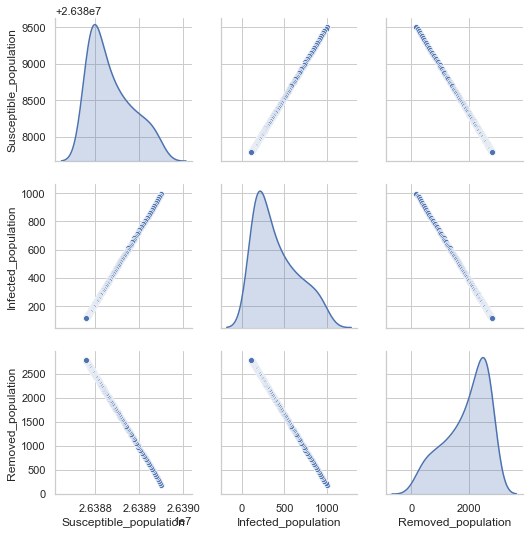

In [344]:
g = sns.pairplot(SIR_MODEL_COVID19_CAMEROON, diag_kind="kde")

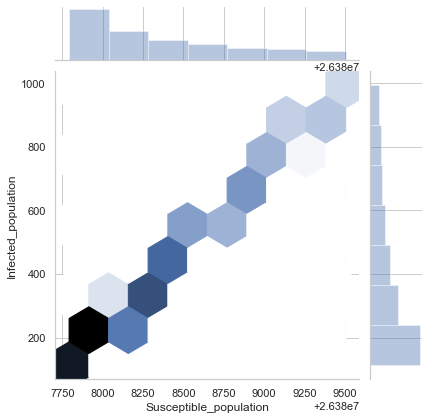

In [345]:
g = sns.jointplot("Susceptible_population", "Infected_population", data= SIR_MODEL_COVID19_CAMEROON, kind="hex")


# IN A SIR MODEL AN EPIDEMIC OR PENDEMIC WILL ACCURE PROVIDED THA R0 > 1 

<function matplotlib.pyplot.show(*args, **kw)>

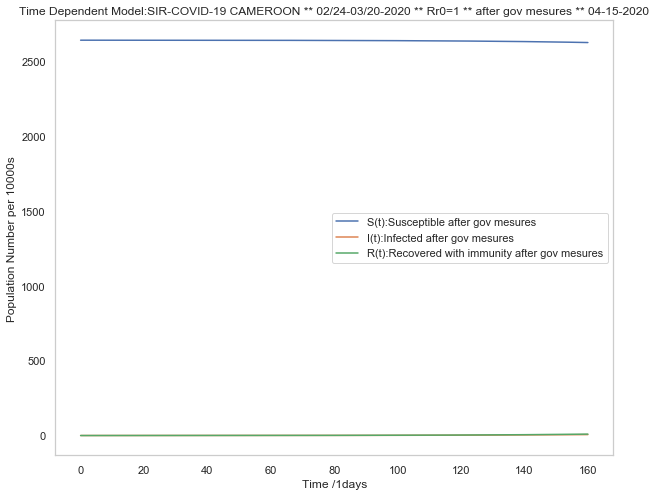

In [346]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize = [10,8])
plt.plot(t, solution4[:,0]/10000,label = "S(t):Susceptible after gov mesures")
plt.plot(t, solution4[:,1]/10000,label = "I(t):Infected after gov mesures")
plt.plot(t, solution4[:,2]/10000,label = "R(t):Recovered with immunity after gov mesures")
plt.grid()
plt.legend()
plt.xlabel("Time /1days")
plt.ylabel("Population Number per 10000s")
plt.title("Time Dependent Model:SIR-COVID-19 CAMEROON ** 02/24-03/20-2020 ** Rr0=1 ** after gov mesures ** 04-15-2020")
plt.show

In [347]:
Susceptible_population =  pd.Series(solution4[:,0])
Infected_population    =  pd.Series(solution4[:,1])
Removed_population     =  pd.Series(solution4[:,2])
date                   = pd.Series( pd.date_range(start="2020-04-17",end="2020-09-23") )

SIR_MODEL_COVID19_CAMEROON = pd.DataFrame( {'date':date, 'Susceptible_population':Susceptible_population, 'Infected_population':Infected_population, 'Removed_population':Removed_population})
SIR_MODEL_COVID19_CAMEROON

,date,Susceptible_population,Infected_population,Removed_population
0,2020-04-17,2.638950e+07,996.000000,186.000000
1,2020-04-18,2.638944e+07,1022.375676,226.619088
2,2020-04-19,2.638937e+07,1049.449642,268.313829
3,2020-04-20,2.638930e+07,1077.240375,311.112701
4,2020-04-21,2.638923e+07,1105.766843,355.044938
...,...,...,...,...
155,2020-09-19,2.624789e+07,56516.761335,86276.086526
156,2020-09-20,2.624411e+07,57992.482108,88580.549304
157,2020-09-21,2.624023e+07,59506.162505,90945.172987
158,2020-09-22,2.623626e+07,61058.748518,93371.504478


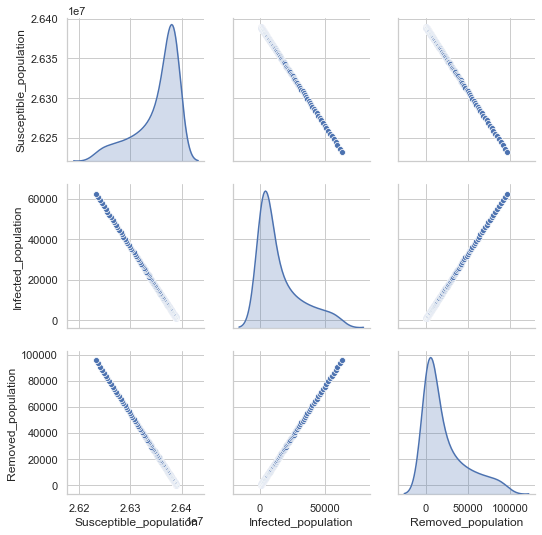

In [348]:
g = sns.pairplot(SIR_MODEL_COVID19_CAMEROON, diag_kind="kde")

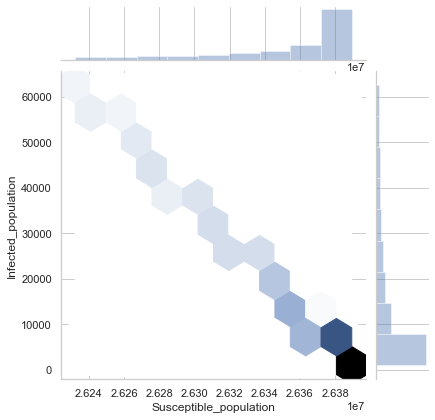

In [349]:
g = sns.jointplot("Susceptible_population", "Infected_population", data= SIR_MODEL_COVID19_CAMEROON, kind="hex")


# infection threshold
The number of susceptible population for infection rate to be zero(changing from a positive infection to negative infection)
dI/dt = 0

In [350]:
print ("Infection threshold for Rr0 = 1.27 is :",b/a0)
print ("Infection threshold for Rr0 = 2.11  is :",b/a1)
print ("Infection threshold for Rr0 = 2.85 is :",b/a2)


Infection threshold for Rr0 = 1.27 is : 12500000.0
Infection threshold for Rr0 = 2.11  is : 7547169.811320755
Infection threshold for Rr0 = 2.85 is : 5555555.555555556


# To significantly slow the spraid of the disease (dI/dt < 0) after DAY(0) Governemt mesure was put in place to reduce the chance of contacting the disease(COVID-19) by factor of (k)

# How those the threshold change in this situation

In [351]:
# a_new: new transmition coefficient
# b_new: new recovered rate(do not change most of the time with preventive mesure)
k = 2.5
print("the new threshold to reduce the chance of contacting COVID-19-Rr = 1.27 by factor of 20 is:", k * (b/a0))
print("the new threshold to reduce the chance of contacting COVID-19-Rr = 2.11 by factor of 20 is:", k * (b/a1))
print("the new threshold to reduce the chance of contacting COVID-19-Rr = 2.85 by factor of 20 is:", k * (b/a2))

the new threshold to reduce the chance of contacting COVID-19-Rr = 1.27 by factor of 20 is: 31250000.0
the new threshold to reduce the chance of contacting COVID-19-Rr = 2.11 by factor of 20 is: 18867924.528301887
the new threshold to reduce the chance of contacting COVID-19-Rr = 2.85 by factor of 20 is: 13888888.88888889


# SIR TRAVELLING WAVE CAVID-19 MODEL- CAMEROON(Population Change over Space)

# Assumption to the Model
1 - susceptible do not move 

2 - Infected going to migrate at constant rate

3 - Recorvered or Removed population do not move 

WAVE MODEL IS FOCUST ON I(t)
#### 0 = C * dS/dy - I*S ####
#### 0 = (d^2 )I/ d(y^2) + C * dI/dy + I  * (S-1/R0)   with  y = x - C * t ####

# WHAT IS THE WAVE SPEED OF COVID-19 IN CAMEROON UP TO 04-15-2020
Rr0 = S0 * q with q = a / b

For tavelling wave solution to exist the minimum require wave speed is 2 * rms(1-1/R0)
#### Cmin = 2 * rms(1-1/R0)  ####
#### C is the speed of travelling wave also the speed of COVID-19 as it propagate throught the population. For COVID-19, the speed of spraid C should be minimum as posible to slow dow the propagation of the virus throught the population. We can make C small by making  R0 small  PROVIDED THAT R0 > 1 


In [352]:

Rr0 = .38
Speed_of_the_spraid_of_COVID19 = 2 * np.sqrt( 1 - (1/Rr0 ))

if (Rr0 < 1):
    print("the speed of the spraid of COVID-19 in CAMEROON is : do not exit because Rro < 1 ")
else :
    print (" the speed of the spraid of COVID-19 in CAMEROON is : ",Speed_of_the_spraid_of_COVID19)


the speed of the spraid of COVID-19 in CAMEROON is : do not exit because Rro < 1 


C:\Users\18562\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


# WHAT IS THE SEVERITY OF COVID-19 IN CAMEROON AS OF 04-15-2020
If we get how many people was left after the disease we can get how many was actualy affected
#### What is the number of Susceptible (S) left at the end of the COVID-19 outbrake 
Rend  = -Send + I0 + S0

Send - 1/q * ln(Send) = I0 + S0 - 1/q * ln(S0)

I + S - 1/q * ln(S) = I0 + S0 - 1/q * ln(S0)

#### Send - 1/Rr.0 * ln *(Send) = 1 
#### The best way to deal with implicit equation is to plot a gragh to find the relationship between Send and Rr0.  Send = f(Rr0)


In [353]:
data = { 'Send': [1, 0.8, 0.6,0.2, 0.1, 0.05, 0.03, 0.01, 0],'Rr0': [1, 1.25,  1.35, 1.50, 1.75, 2.25, 2.75, 2.85, 3] }
data = pd.DataFrame(data)
data


,Send,Rr0
0,1.00,1.00
1,0.80,1.25
2,0.60,1.35
3,0.20,1.50
4,0.10,1.75
5,0.05,2.25
6,0.03,2.75
7,0.01,2.85
8,0.00,3.00


<function matplotlib.pyplot.show(*args, **kw)>

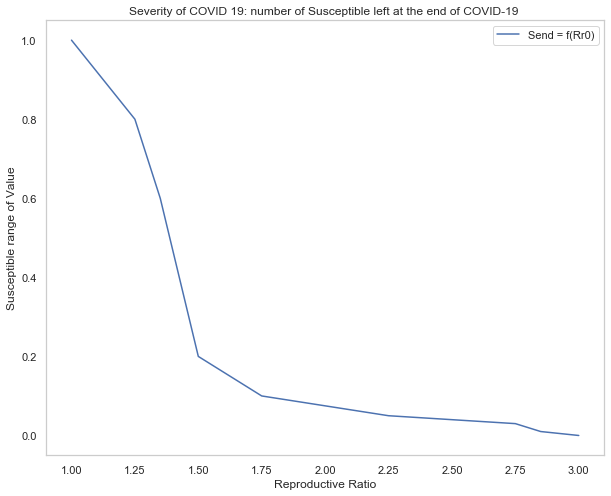

In [354]:
plt.figure(figsize = [10,8])
plt.plot(data['Rr0'], data['Send'],label = "Send = f(Rr0)")
plt.grid()
plt.legend()
plt.xlabel("Reproductive Ratio")
plt.ylabel("Susceptible range of Value")
plt.title("Severity of COVID 19: number of Susceptible left at the end of COVID-19 ")
plt.show